## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [16]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [17]:
train, test = keras.datasets.cifar10.load_data()

In [18]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [19]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [20]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [21]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.75, 0.55]

In [22]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for M in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    #print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=M)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = str(M)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 256

50000/50000 [==============================] - 8s 169us/step - loss: 0.8947 - accuracy: 0.6862 - val_loss: 1.3979 - val_accuracy: 0.5230
Epoch 49/50
50000/50000 [==============================] - 8s 169us/step - loss: 0.8780 - accuracy: 0.6916 - val_loss: 1.5141 - val_accuracy: 0.5102
Epoch 50/50
50000/50000 [==============================] - 9s 178us/step - loss: 0.8676 - accuracy: 0.6940 - val_loss: 1.5244 - val_accuracy: 0.4969
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense

Epoch 46/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4147 - accuracy: 0.5065 - val_loss: 1.4608 - val_accuracy: 0.4854
Epoch 47/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.4082 - accuracy: 0.5089 - val_loss: 1.4585 - val_accuracy: 0.4848
Epoch 48/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.4025 - accuracy: 0.5096 - val_loss: 1.4575 - val_accuracy: 0.4840
Epoch 49/50
50000/50000 [==============================] - 10s 190us/step - loss: 1.3965 - accuracy: 0.5132 - val_loss: 1.4904 - val_accuracy: 0.4714
Epoch 50/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.3918 - accuracy: 0.5151 - val_loss: 1.4604 - val_accuracy: 0.4847
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________________________________

Epoch 44/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.5536 - accuracy: 0.4585 - val_loss: 1.5712 - val_accuracy: 0.4465
Epoch 45/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5483 - accuracy: 0.4586 - val_loss: 1.5700 - val_accuracy: 0.4487
Epoch 46/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5446 - accuracy: 0.4601 - val_loss: 1.5635 - val_accuracy: 0.4537
Epoch 47/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.5399 - accuracy: 0.4621 - val_loss: 1.5567 - val_accuracy: 0.4509
Epoch 48/50
50000/50000 [==============================] - 8s 150us/step - loss: 1.5356 - accuracy: 0.4637 - val_loss: 1.5674 - val_accuracy: 0.4483
Epoch 49/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.5307 - accuracy: 0.4661 - val_loss: 1.5537 - val_accuracy: 0.4541
Epoch 50/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5264 - accuracy: 0.467

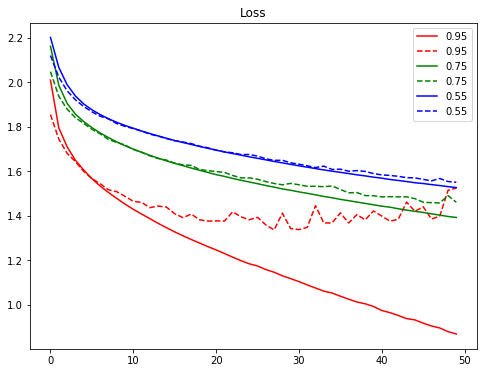

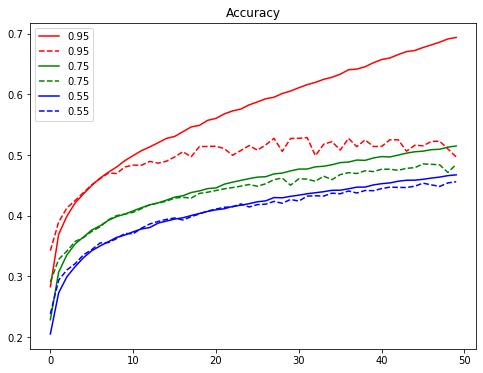

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()